# Imports & File Load

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
# import requests
# import json
import re
# import os
# import time
import datetime
# from bs4 import BeautifulSoup
from collections import Counter
%matplotlib inline

In [2]:
df = pd.read_csv("sources/judges_careersCurrentFirst.csv")
df.head(3)

,nid,jid,Last Name,First Name,Middle Name,Suffix,Birth Month,Birth Day,Birth Year,Birth City,...,Degree (3),Degree Year (3),School (4),Degree (4),Degree Year (4),School (5),Degree (5),Degree Year (5),Professional Career,Other Nominations/Recess Appointments
0,1393126,3258,Scarburgh,George,Parker,,2.0,11.0,1807,Accomack County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Accomack County, Virginia, 1...",NaN
1,1393041,3241,Gilchrist,John,James,,2.0,16.0,1809,Medford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Charlestown, New Hampshire, ...",NaN
2,1393146,3262,Loring,Edward,Greely,,1.0,28.0,1802,Boston,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice and master in chancery, Suffo...",NaN


# File Investigation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Columns: 201 entries, nid to Other Nominations/Recess Appointments
dtypes: float64(56), int64(2), object(143)
memory usage: 3.6+ MB


In [4]:
original_size = df.memory_usage().sum()
original_size

3827024

In [5]:
# df.dtypes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 201 columns):
nid                                      int64
jid                                      int64
Last Name                                object
First Name                               object
Middle Name                              object
Suffix                                   object
Birth Month                              float64
Birth Day                                float64
Birth Year                               object
Birth City                               object
Birth State                              object
Death Month                              float64
Death Day                                float64
Death Year                               float64
Death City                               object
Death State                              object
Gender                                   object
Race or Ethnicity                        object
Court Type (1)           

# Basic Clean
- make easy column headers
- remove the circa abbreviation everywhere 
- convert separated birth/death info to united field
- convert all string dates into datetime
- convert year-only dates into datetime
- convert repeated strings to categories

In [6]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '_n_')
df.columns = df.columns.str.replace('\(|\)|,', '')
df.replace('ca. ','',regex=True,inplace=True)

In [7]:
df['Birth_Month'] = pd.to_numeric(df['Birth_Month'], errors='coerce').fillna(value=9).astype(int)
df['Birth_Day'] = pd.to_numeric(df['Birth_Day'], errors='coerce').fillna(value=30).astype(int)
df['Birth_Year'] = pd.to_numeric(df['Birth_Year'], errors='coerce').fillna(value=1677).astype(int)
df['Birth_Date'] = df.Birth_Year.map(str).astype(str).str.zfill(4) + '-' + df.Birth_Month.map(str).astype(str).str.zfill(2) + '-' + df.Birth_Day.map(str).astype(str).str.zfill(2)
df['Death_Month'] = pd.to_numeric(df['Death_Month'], errors='coerce').fillna(value=9).astype(int)
df['Death_Day'] = pd.to_numeric(df['Death_Day'], errors='coerce').fillna(value=30).astype(int)
df['Death_Year'] = pd.to_numeric(df['Death_Year'], errors='coerce').fillna(value=1677).astype(int)
df['Death_Date'] = df.Death_Year.map(str).astype(str).str.zfill(4) + '-' + df.Death_Month.map(str).astype(str).str.zfill(2) + '-' + df.Death_Day.map(str).astype(str).str.zfill(2)

In [8]:
df.Death_Date.head()

0    1879-12-21
1    1858-04-29
2    1890-06-19
3    1907-12-27
4    1905-04-10
Name: Death_Date, dtype: object

In [9]:
forceDT = [
    'Birth_Date','Death_Date',
    'Recess_Appointment_Date_1','Nomination_Date_1','Committee_Referral_Date_1','Hearing_Date_1','Committee_Action_Date_1','Confirmation_Date_1','Commission_Date_1','Service_as_Chief_Judge_Begin_1','Service_as_Chief_Judge_End_1','2nd_Service_as_Chief_Judge_Begin_1','2nd_Service_as_Chief_Judge_End_1','Senior_Status_Date_1','Termination_Date_1',
    'Recess_Appointment_Date_2','Nomination_Date_2','Committee_Referral_Date_2','Hearing_Date_2','Committee_Action_Date_2','Confirmation_Date_2','Commission_Date_2','Service_as_Chief_Judge_Begin_2','Service_as_Chief_Judge_End_2','2nd_Service_as_Chief_Judge_Begin_2','2nd_Service_as_Chief_Judge_End_2','Senior_Status_Date_2','Termination_Date_2',
    'Recess_Appointment_Date_3','Nomination_Date_3','Committee_Referral_Date_3','Hearing_Date_3','Committee_Action_Date_3','Confirmation_Date_3','Commission_Date_3','Service_as_Chief_Judge_Begin_3','Service_as_Chief_Judge_End_3','2nd_Service_as_Chief_Judge_Begin_3','2nd_Service_as_Chief_Judge_End_3','Senior_Status_Date_3','Termination_Date_3',
    'Recess_Appointment_Date_4','Nomination_Date_4','Committee_Referral_Date_4','Hearing_Date_4','Committee_Action_Date_4','Confirmation_Date_4','Commission_Date_4','Service_as_Chief_Judge_Begin_4','Service_as_Chief_Judge_End_4','2nd_Service_as_Chief_Judge_Begin_4','2nd_Service_as_Chief_Judge_End_4','Senior_Status_Date_4','Termination_Date_4',
    'Recess_Appointment_Date_5','Nomination_Date_5','Committee_Referral_Date_5','Hearing_Date_5','Committee_Action_Date_5','Confirmation_Date_5','Commission_Date_5','Service_as_Chief_Judge_Begin_5','Service_as_Chief_Judge_End_5','2nd_Service_as_Chief_Judge_Begin_5','2nd_Service_as_Chief_Judge_End_5','Senior_Status_Date_5','Termination_Date_5',
    'Recess_Appointment_Date_6','Nomination_Date_6','Committee_Referral_Date_6','Hearing_Date_6','Committee_Action_Date_6','Confirmation_Date_6','Commission_Date_6','Service_as_Chief_Judge_Begin_6','Service_as_Chief_Judge_End_6','2nd_Service_as_Chief_Judge_Begin_6','2nd_Service_as_Chief_Judge_End_6','Senior_Status_Date_6','Termination_Date_6'
]
df[forceDT] = df[forceDT].apply(pd.to_datetime)

In [10]:
df['Degree_Year_1'] = pd.to_datetime(df['Degree_Year_1'],format='%Y', errors='coerce')
df['Degree_Year_2'] = pd.to_datetime(df['Degree_Year_2'],format='%Y', errors='coerce')
df['Degree_Year_3'] = pd.to_datetime(df['Degree_Year_3'],format='%Y', errors='coerce')
df['Degree_Year_4'] = pd.to_datetime(df['Degree_Year_4'],format='%Y', errors='coerce')
df['Degree_Year_5'] = pd.to_datetime(df['Degree_Year_5'],format='%Y', errors='coerce')

In [11]:
df['Full_Name'] = df.First_Name + ' ' + df.Middle_Name + ' ' + df.Last_Name + ', ' + df.Suffix
df.Full_Name.replace(r'\s{2,4}',' ',regex=True,inplace=True)
df.Full_Name.replace(r', $','',regex=True,inplace=True)
df.Full_Name.head(30)

0          George Parker Scarburgh
1             John James Gilchrist
2             Edward Greely Loring
3     John Chandler Bancroft Davis
4                  Lawrence Weldon
5           George Wesley Atkinson
6                        James Hay
7            William Raymond Green
8             Joseph Warren Madden
9           Isaac Newton Blackford
10                    James Hughes
11             Charles Bowen Howry
12              George Eddy Downey
13              John McKenzie Moss
14      Benjamin Horsley Littleton
15            James Randall Durfee
16                    Joseph Casey
17            Charles Daniel Drake
18        William Adams Richardson
19             Charles Cooper Nott
20          Stanton Judkins Peelle
21          Edward Kernan Campbell
22           Fenton Whitlock Booth
23            Richard Smith Whaley
24                    David Wilmot
25                 Samuel Milligan
26                      John Davis
27           Nicholas John Sinnott
28          Thomas S

In [12]:
df.memory_usage().sum() / original_size * 100

118.14652847748015

In [13]:
# forceCat = [
#     'Gender','Race_or_Ethnicity','Birth_City','Birth_State','Death_City','Death_State',
#     'Court_Type_1','Court_Name_1','Appointment_Title_1','Appointing_President_1','Party_of_Appointing_President_1','Reappointing_President_1','Party_of_Reappointing_President_1','ABA_Rating_1','Judiciary_Committee_Action_1','Senate_Vote_Type_1','Termination_1',
#     'Court_Type_2','Court_Name_2','Appointment_Title_2','Appointing_President_2','Party_of_Appointing_President_2','Reappointing_President_2','Party_of_Reappointing_President_2','ABA_Rating_2','Judiciary_Committee_Action_2','Senate_Vote_Type_2','Termination_2',
#     'Court_Type_3','Court_Name_3','Appointment_Title_3','Appointing_President_3','Party_of_Appointing_President_3','Reappointing_President_3','Party_of_Reappointing_President_3','ABA_Rating_3','Judiciary_Committee_Action_3','Senate_Vote_Type_3','Termination_3',
#     'Court_Type_4','Court_Name_4','Appointment_Title_4','Appointing_President_4','Party_of_Appointing_President_4','Reappointing_President_4','Party_of_Reappointing_President_4','ABA_Rating_4','Judiciary_Committee_Action_4','Senate_Vote_Type_4','Termination_4',
#     'Court_Type_5','Court_Name_5','Appointment_Title_5','Appointing_President_5','Party_of_Appointing_President_5','Reappointing_President_5','Party_of_Reappointing_President_5','ABA_Rating_5','Judiciary_Committee_Action_5','Senate_Vote_Type_5','Termination_5',
#     'Court_Type_6','Court_Name_6','Appointment_Title_6','Appointing_President_6','Party_of_Appointing_President_6','Reappointing_President_6','Party_of_Reappointing_President_6','ABA_Rating_6','Judiciary_Committee_Action_6','Senate_Vote_Type_6','Termination_6',
#     'School_1','Degree_1','School_2','Degree_2','School_3','Degree_3','School_4','Degree_4','School_5','Degree_5'
# ]
# df[forceCat] = df[forceCat].astype('category')
# df.memory_usage().sum() / original_size * 100

In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 204 columns):
nid                                        int64
jid                                        int64
Last_Name                                  object
First_Name                                 object
Middle_Name                                object
Suffix                                     object
Birth_Month                                int32
Birth_Day                                  int32
Birth_Year                                 int32
Birth_City                                 object
Birth_State                                object
Death_Month                                int32
Death_Day                                  int32
Death_Year                                 int32
Death_City                                 object
Death_State                                object
Gender                                     object
Race_or_Ethnicity                          object


# Join Key Tables

### Additional Info on Presidents

In [15]:
columns = ['Pres_Num','Pres_Name','Pres_State_Abbrev']
pres_df = pd.read_csv("sources/key_presidents.csv", usecols=columns)
df = df.merge(pres_df, left_on='Appointing_President_1', right_on='Pres_Name')
df = df.rename({'Pres_Num':'Appointing_President_Num_1', 'Pres_State_Abbrev':'Appointing_President_State_1'}, axis=1)
del df['Pres_Name']
df.head()

,nid,jid,Last_Name,First_Name,Middle_Name,Suffix,Birth_Month,Birth_Day,Birth_Year,Birth_City,...,School_5,Degree_5,Degree_Year_5,Professional_Career,Other_Nominations_n_Recess_Appointments,Birth_Date,Death_Date,Full_Name,Appointing_President_Num_1,Appointing_President_State_1
0,1393126,3258,Scarburgh,George,Parker,,2,11,1807,Accomack County,...,NaN,NaN,NaT,"Private practice, Accomack County, Virginia, 1...",NaN,1807-02-11,1879-12-21,George Parker Scarburgh,14,NH
1,1393041,3241,Gilchrist,John,James,,2,16,1809,Medford,...,NaN,NaN,NaT,"Private practice, Charlestown, New Hampshire, ...",NaN,1809-02-16,1858-04-29,John James Gilchrist,14,NH
2,1393006,3234,Blackford,Isaac,Newton,,11,6,1786,Bound Brook,...,NaN,NaN,NaT,"Private practice, Indiana Territory, 1812-1813...",NaN,1786-11-06,1859-12-31,Isaac Newton Blackford,14,NH
3,1378771,361,Campbell,John,Archibald,,6,24,1811,Washington,...,NaN,NaN,NaT,"Private practice, Washington, Georgia, 1829; P...",NaN,1811-06-24,1889-03-12,John Archibald Campbell,14,NH
4,1390926,2818,Dunlop,James,,,3,28,1793,Georgetown,...,NaN,NaN,NaT,"Private practice, Georgetown, D.C., 1863-1872;...",NaN,1793-03-28,1872-05-06,James Dunlop,14,NH


### Additional Info on Courts
* This will delete rows of very outdated courts/panels; to maintain, switch "how" field to "outer"

In [16]:
columns = ['Court_Circuit','Court_Name_Long','Court_Abbrev_Bluebook','Court_Abbrev_Website','State_Abbrev']
pres_df = pd.read_csv("sources/key_courts.csv", usecols=columns)
df = df.merge(pres_df, how='inner', left_on='Court_Name_1', right_on='Court_Name_Long')
df = df.rename({'Court_Circuit':'Court_Circuit_1','Court_Abbrev_Bluebook':'Court_Abbrev_Bluebook_1','Court_Abbrev_Website':'Court_Abbrev_Website_1','State_Abbrev':'Court_State_1'}, axis=1)
del df['Court_Name_Long']
df.head()

,nid,jid,Last_Name,First_Name,Middle_Name,Suffix,Birth_Month,Birth_Day,Birth_Year,Birth_City,...,Other_Nominations_n_Recess_Appointments,Birth_Date,Death_Date,Full_Name,Appointing_President_Num_1,Appointing_President_State_1,Court_Circuit_1,Court_Abbrev_Bluebook_1,Court_Abbrev_Website_1,Court_State_1
0,1393126,3258,Scarburgh,George,Parker,,2,11,1807,Accomack County,...,NaN,1807-02-11,1879-12-21,George Parker Scarburgh,14,NH,NaN,NaN,NaN,NaN
1,1393041,3241,Gilchrist,John,James,,2,16,1809,Medford,...,NaN,1809-02-16,1858-04-29,John James Gilchrist,14,NH,NaN,NaN,NaN,NaN
2,1393006,3234,Blackford,Isaac,Newton,,11,6,1786,Bound Brook,...,NaN,1786-11-06,1859-12-31,Isaac Newton Blackford,14,NH,NaN,NaN,NaN,NaN
3,1393146,3262,Loring,Edward,Greely,,1,28,1802,Boston,...,NaN,1802-01-28,1890-06-19,Edward Greely Loring,15,PA,NaN,NaN,NaN,NaN
4,1393186,3270,Hughes,James,,,11,24,1823,Bladensburg,...,NaN,1823-11-24,1873-10-21,James Hughes,15,PA,NaN,NaN,NaN,NaN


### Court "Emergencies"

In [18]:
columns = ['Court_Code','First_Name','Last_Name','Weighted_Filings_Per_Seat','Adjusted_Filings_Per_Panel','Vacancy_Reason']
emrg_df = pd.read_csv("sources/judicial_emergencies.csv", usecols=columns)
df = df.merge(emrg_df, how='left', left_on=['First_Name','Last_Name','Court_Abbrev_Website_1'], right_on=['First_Name','Last_Name','Court_Code'])
df = df.rename({'Weighted_Filings_Per_Seat':'Filings_Per_Seat_Weighted','Adjusted_Filings_Per_Panel':'Filings_Per_Panel_Adjusted'}, axis=1)
# del df['Court_Code']
df.head()

,nid,jid,Last_Name,First_Name,Middle_Name,Suffix,Birth_Month,Birth_Day,Birth_Year,Birth_City,...,Appointing_President_Num_1,Appointing_President_State_1,Court_Circuit_1,Court_Abbrev_Bluebook_1,Court_Abbrev_Website_1,Court_State_1,Court_Code,Vacancy_Reason,Filings_Per_Seat_Weighted,Filings_Per_Panel_Adjusted
0,1393126,3258,Scarburgh,George,Parker,,2,11,1807,Accomack County,...,14,NH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1393041,3241,Gilchrist,John,James,,2,16,1809,Medford,...,14,NH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1393006,3234,Blackford,Isaac,Newton,,11,6,1786,Bound Brook,...,14,NH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1393146,3262,Loring,Edward,Greely,,1,28,1802,Boston,...,15,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1393186,3270,Hughes,James,,,11,24,1823,Bladensburg,...,15,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df['Vacancy_Date'] = df[['Termination_Date_1','Senior_Status_Date_1']].max(axis=1)
SCRAPE_TIME = np.datetime64(datetime.datetime.now())
df['Vacancy_Duration_ATSCRAPE'] = SCRAPE_TIME - df.Vacancy_Date

In [21]:
df.Vacancy_Duration_ATSCRAPE.head()  #.astype(str).str.extract(r'(\d*)\s').head()

0   57785 days 01:27:23.045008
1   58872 days 01:27:23.045008
2   58261 days 01:27:23.045008
3   51703 days 01:27:23.045008
4   56464 days 01:27:23.045008
Name: Vacancy_Duration_ATSCRAPE, dtype: timedelta64[ns]

In [22]:
df.memory_usage().sum() / original_size * 100

117.70242360643675

In [23]:
# df[['Appointing_President_State_1','Court_Circuit_1','Court_Abbrev_Bluebook_1','Court_Abbrev_Website_1','Court_State_1']] = df[['Appointing_President_State_1','Court_Circuit_1','Court_Abbrev_Bluebook_1','Court_Abbrev_Website_1','Court_State_1']].astype('category')
# df.memory_usage().sum() / original_size * 100

### Set Colors

In [24]:
# colorsP = {'Democratic': 'lightskyblue', 
#           'Federalist': 'slategrey', 
#           'Jeffersonian Republican': 'seagreen', 
#           'Republican': 'crimson', 
#           'Whig': 'gold'}
# df['Party_Color_1'] = df['Party_of_Appointing_President_1'].map(colorsP)
# colorsC = {'Supreme Court': 'darkgoldenrod', 
#           'U.S. Court of Appeals': 'gold', 
#           'U.S. District Court': 'palegoldenrod', 
#           'Other': 'navajowhite'}
# df['Court_Color_1'] = df['Court_Type_1'].map(colorsC)

### Make Useful Repeating Seat Code (not tied to individuals)

In [25]:
df['Seat_ID_SeatNum_1'] = df.Seat_ID_1.str.extract(r'.*(\d\d)\d\d').dropna()
df['Seat_ID_Code_1'] = df.Court_Abbrev_Website_1.str.replace(r' ',r'') + '-'
df['Seat_Code_1'] = df.Seat_ID_Code_1 + df.Seat_ID_SeatNum_1
df = df.drop(['Seat_ID_Code_1','Seat_ID_SeatNum_1'], axis=1)
# df.Seat_Code_1 = df.Seat_Code_1.astype('category')
df.Seat_Code_1.value_counts().head(10)

SC-04         19
SC-01         18
03-NJ-02      17
03-PA-W-01    16
01-RI-01      14
SC-05         13
SC-03         13
02-VT-01      13
SC-07         12
09-CCA-03     12
Name: Seat_Code_1, dtype: int64

### Check Additions

In [26]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3465 entries, 0 to 3464
Data columns (total 217 columns):
nid                                        int64
jid                                        int64
Last_Name                                  object
First_Name                                 object
Middle_Name                                object
Suffix                                     object
Birth_Month                                int32
Birth_Day                                  int32
Birth_Year                                 int32
Birth_City                                 object
Birth_State                                object
Death_Month                                int32
Death_Day                                  int32
Death_Year                                 int32
Death_City                                 object
Death_State                                object
Gender                                     object
Race_or_Ethnicity                          object


# Basic Research

### Most Appointments

In [27]:
df.Appointing_President_1.value_counts()

William J. Clinton       357
Ronald Reagan            338
Barack Obama             324
George W. Bush           314
Jimmy Carter             239
Richard M. Nixon         200
George H.W. Bush         178
Franklin D. Roosevelt    169
Lyndon B. Johnson        148
Dwight D. Eisenhower     148
Donald J. Trump          122
Harry S Truman           121
John F. Kennedy           99
Calvin Coolidge           71
Grover Cleveland          62
Theodore Roosevelt        58
Woodrow Wilson            57
Herbert Hoover            54
Gerald Ford               49
William H. Taft           45
Warren G. Harding         43
Ulysses Grant             30
Benjamin Harrison         29
William McKinley          24
Abraham Lincoln           22
George Washington         21
Chester A. Arthur         18
Franklin Pierce           15
James Monroe              13
Rutherford B. Hayes       12
Andrew Jackson            11
James Buchanan             9
Martin Van Buren           9
John Quincy Adams          9
Andrew Johnson

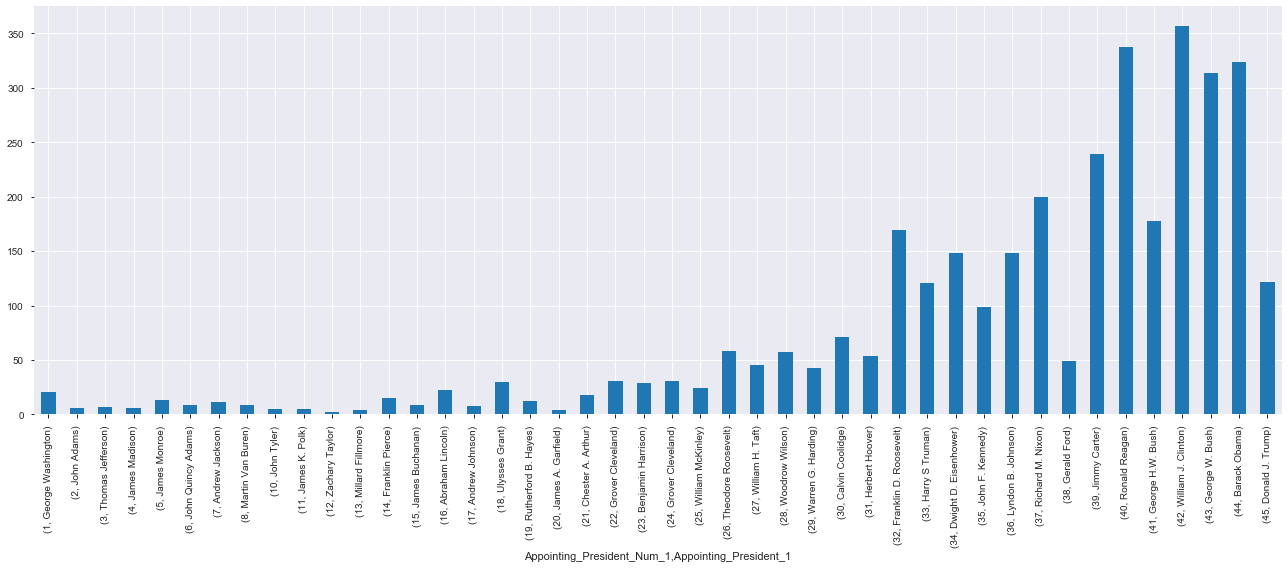

In [28]:
df.groupby(by='Appointing_President_Num_1').Appointing_President_1.value_counts().plot(kind='bar',figsize=(18, 8))
plt.tight_layout()

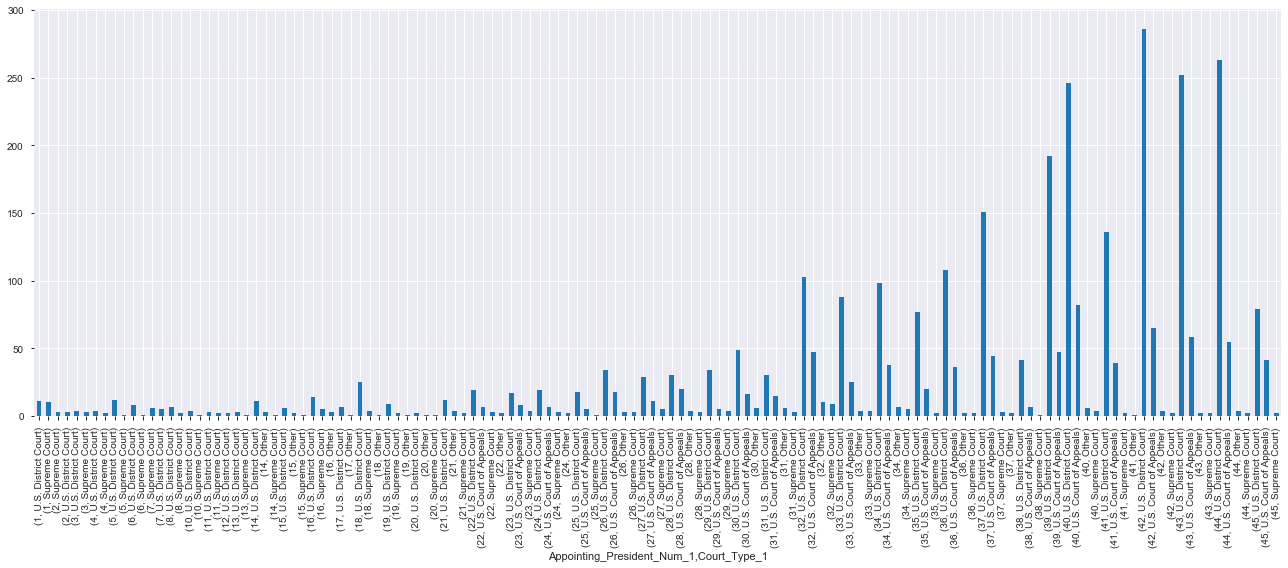

In [29]:
df.groupby(by='Appointing_President_Num_1').Court_Type_1.value_counts().plot(kind='bar',figsize=(18, 8))
plt.tight_layout()

### Qualifications
- ABA Rating
- Committee Recommendations
- Termination Types

In [30]:
df.ABA_Rating_1.value_counts()

Well Qualified                    1270
Qualified                          891
Not Qualified                       16
Exceptionally Well Qualified        15
Not Qualified By Reason of Age       2
Name: ABA_Rating_1, dtype: int64

In [31]:
df[df.ABA_Rating_1.str.contains("Not", na=False)]['Appointing_President_1'].value_counts()

Lyndon B. Johnson     5
George W. Bush        4
Donald J. Trump       4
Jimmy Carter          2
William J. Clinton    2
John F. Kennedy       1
Name: Appointing_President_1, dtype: int64

In [32]:
df[df.ABA_Rating_1.str.contains("Not", na=False)][['Full_Name','ABA_Rating_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Full_Name,ABA_Rating_1,Appointing_President_1,Confirmation_Date_1
1070,NaN,Not Qualified,Donald J. Trump,2018-12-11
2781,NaN,Not Qualified,Donald J. Trump,2018-08-28
1443,NaN,Not Qualified,Donald J. Trump,2018-08-01
1068,NaN,Not Qualified,Donald J. Trump,2017-12-12
3009,Gregory Frederick Van Tatenhove,Not Qualified,George W. Bush,2005-12-21
1620,Dora L. Irizarry,Not Qualified,George W. Bush,2004-06-24
406,Roger T. Benitez,Not Qualified,George W. Bush,2004-06-17
3008,David L. Bunning,Not Qualified,George W. Bush,2002-02-14
354,David A. Katz,Not Qualified,William J. Clinton,1994-10-07
210,"Alexander Williams, Jr.",Not Qualified,William J. Clinton,1994-08-17


In [33]:
df[df.ABA_Rating_2.str.contains("Not", na=False)][['Full_Name','ABA_Rating_2','Appointing_President_2','Confirmation_Date_2']].sort_values(by='Confirmation_Date_2', ascending=False)

,Full_Name,ABA_Rating_2,Appointing_President_2,Confirmation_Date_2
1272,David Frank Hamilton,Not Qualified,William J. Clinton,1994-10-07
891,Donald Eugene O'Brien,Not Qualified,Jimmy Carter,1978-10-04
3104,Sidney Lee Christie,Not Qualified By Reason of Age,Lyndon B. Johnson,1964-04-30


In [34]:
df.Judiciary_Committee_Action_1.value_counts()

Reported (favorably)                     3255
Reported (no recommendation recorded)      70
Not Referred to Committee                  61
No Committee before December 10, 1816      40
Not Reported                               12
Reported (unknown)                          9
Reported (unfavorably)                      8
Reported (without recommendation)           6
Name: Judiciary_Committee_Action_1, dtype: int64

In [35]:
df[~df.Judiciary_Committee_Action_1.str.contains("\(favorably", na=False)][['Full_Name','Judiciary_Committee_Action_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False).dropna().head(60)

,Full_Name,Judiciary_Committee_Action_1,Appointing_President_1,Confirmation_Date_1
2533,J[ames] Leon Holmes,Reported (without recommendation),George W. Bush,2004-07-06
104,Clarence Thomas,Reported (without recommendation),George H.W. Bush,1991-10-15
1263,Daniel Anthony Manion,Reported (without recommendation),Ronald Reagan,1986-06-26
2808,John Joseph Hickey,Reported (no recommendation recorded),Lyndon B. Johnson,1966-06-09
1379,Collins Jacques Seitz,Reported (no recommendation recorded),Lyndon B. Johnson,1966-06-09
1557,Frederick Jacob Reagan Heebe,Reported (no recommendation recorded),Lyndon B. Johnson,1966-03-25
2514,Russell Evans Smith,Reported (no recommendation recorded),Lyndon B. Johnson,1966-03-25
1345,"George Clifton Edwards, Jr.",Reported (no recommendation recorded),John F. Kennedy,1963-12-16
706,Edward Dumbauld,Not Reported,John F. Kennedy,1961-08-02
1073,Albert Alphonso Ridge,Reported (no recommendation recorded),John F. Kennedy,1961-06-14


In [36]:
df.Termination_1.value_counts()

Death                               1580
Retirement                           290
Resignation                          230
Recess Appointment-Not Confirmed      16
Impeachment & Conviction               8
Name: Termination_1, dtype: int64

In [37]:
df[df.Termination_1.str.contains("Impeachment", na=False)][['Full_Name','Termination_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Full_Name,Termination_1,Appointing_President_1,Confirmation_Date_1
1571,"G. Thomas Porteous, Jr.",Impeachment & Conviction,William J. Clinton,1994-10-07
2285,Alcee Lamar Hastings,Impeachment & Conviction,Jimmy Carter,1979-10-31
781,Harry E. Claiborne,Impeachment & Conviction,Jimmy Carter,1978-08-11
3087,"Walter Louis Nixon, Jr.",Impeachment & Conviction,Lyndon B. Johnson,1968-06-06
2229,Halsted Lockwood Ritter,Impeachment & Conviction,Calvin Coolidge,1929-02-15
1385,Robert Wodrow Archbald,Impeachment & Conviction,William H. Taft,1911-01-31
439,West Hughes Humphreys,Impeachment & Conviction,Franklin Pierce,1853-03-26
2998,John Pickering,Impeachment & Conviction,George Washington,1795-02-11


In [38]:
df[df.Termination_1.str.contains("Recess", na=False)][['Full_Name','Termination_1','Appointing_President_1','Recess_Appointment_Date_1']].sort_values(by='Recess_Appointment_Date_1', ascending=False)

,Full_Name,Termination_1,Appointing_President_1,Recess_Appointment_Date_1
3218,Walter Meheula Heen,Recess Appointment-Not Confirmed,Jimmy Carter,1981-01-01
2079,David Rabinovitz,Recess Appointment-Not Confirmed,Lyndon B. Johnson,1964-01-07
1734,Monroe Mark Friedman,Recess Appointment-Not Confirmed,Harry S Truman,1952-07-17
851,Maurice Neil Andrews,Recess Appointment-Not Confirmed,Harry S Truman,1949-10-21
2289,Carroll O. Switzer,Recess Appointment-Not Confirmed,Harry S Truman,1949-10-21
942,Floyd H. Roberts,Recess Appointment-Not Confirmed,Franklin D. Roosevelt,1938-07-06
1794,George E. Q. Johnson,Recess Appointment-Not Confirmed,Herbert Hoover,1932-08-03
2394,Wallace McCamant,Recess Appointment-Not Confirmed,Calvin Coolidge,1925-05-25
2245,John Moses Cheney,Recess Appointment-Not Confirmed,William H. Taft,1912-08-26
2360,Clinton Woodbury Howard,Recess Appointment-Not Confirmed,William H. Taft,1912-08-26


### Declined & Rejected Appointments

In [39]:
df[df.Other_Nominations_n_Recess_Appointments.str.contains("(?i)Declined", na=False)][['Full_Name','Other_Nominations_n_Recess_Appointments','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Full_Name,Other_Nominations_n_Recess_Appointments,Appointing_President_1,Confirmation_Date_1
1116,Herbert Stephenson Boreman,Received recess appointment to U.S. Court of A...,Dwight D. Eisenhower,1959-06-16
2031,James V. Allred,Received recess appointment to U.S. District C...,Harry S Truman,1949-10-12
2392,Jed Joseph Johnson,"Nominated to U.S. Customs Court, March 29, 194...",Harry S Truman,1947-06-23
1475,James William McCarthy,Nominated to U.S. District Court for the Distr...,Calvin Coolidge,1929-01-08
758,Frank Herbert Norcross,Received recess appointment to U.S. Court of A...,Calvin Coolidge,1928-04-17
46,William Rufus Day,Received recess appointment to U.S. District C...,Theodore Roosevelt,1903-02-23
2334,Robert Paine Dick,Received recess appointment to U.S. District C...,Ulysses Grant,1872-06-07
2698,Solomon Lewis Withey,Nominated to U.S. District Court for the Weste...,Abraham Lincoln,1863-03-11
134,Henry Brockholst Livingston,Received recess appointment to U.S. District C...,Thomas Jefferson,1806-12-17
118,Thomas Johnson,Nominated to U.S. District Court for the Distr...,George Washington,1791-11-07


In [40]:
df[df.Other_Nominations_n_Recess_Appointments.str.contains("(?i)Rejected", na=False)][['Full_Name','Other_Nominations_n_Recess_Appointments','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Full_Name,Other_Nominations_n_Recess_Appointments,Appointing_President_1,Confirmation_Date_1
296,Ronnie Lee White,Nominated to U.S. District Court for the Easte...,Barack Obama,2014-07-16
1001,Robert Heron Bork,Nominated to Supreme Court of the United State...,Ronald Reagan,1982-02-08
2104,George Harrold Carswell,Nominated to Supreme Court of the United State...,Richard M. Nixon,1969-06-19
1117,"Clement Furman Haynsworth, Jr.",Nominated to Supreme Court of the United State...,Dwight D. Eisenhower,1957-04-04
1109,John Johnston Parker,Nominated to Supreme Court of the United State...,Calvin Coolidge,1925-12-14
468,Ezekiel B. Turner,Nominated to U.S. District Court for the North...,Rutherford B. Hayes,1880-12-20
116,John Rutledge,Nominated to be Chief Justice of the Supreme C...,George Washington,NaT
851,Maurice Neil Andrews,Nominated to U.S. District Court for the North...,Harry S Truman,NaT
942,Floyd H. Roberts,Nominated to U.S. District Court for the Weste...,Franklin D. Roosevelt,NaT
2289,Carroll O. Switzer,Nominated to U.S. District Court for the South...,Harry S Truman,NaT


In [41]:
df['Other_Nomination'] = df["Other_Nominations_n_Recess_Appointments"].str.findall(r"\b(nominated.*\d\d\d\d); .*", flags = re.I).dropna(0)
df['Other_Rejection'] = df["Other_Nominations_n_Recess_Appointments"].str.findall(r"\b(rejected.*\d\d\d\d).*", flags = re.I).dropna(0)
df[df.Other_Nominations_n_Recess_Appointments.str.contains(r"rejected", na=False, flags = re.I)][['Full_Name','Other_Nomination','Other_Rejection','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Full_Name,Other_Nomination,Other_Rejection,Appointing_President_1,Confirmation_Date_1
296,Ronnie Lee White,[Nominated to U.S. District Court for the East...,"[rejected by Senate, October 5, 1999; Nominate...",Barack Obama,2014-07-16
1001,Robert Heron Bork,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, October 23, 1987]",Ronald Reagan,1982-02-08
2104,George Harrold Carswell,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, April 8, 1970]",Richard M. Nixon,1969-06-19
1117,"Clement Furman Haynsworth, Jr.",[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, November 21, 1969]",Dwight D. Eisenhower,1957-04-04
1109,John Johnston Parker,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, May 7, 1930]",Calvin Coolidge,1925-12-14
468,Ezekiel B. Turner,[Nominated to U.S. District Court for the Nort...,"[rejected by Senate, April 2, 1879]",Rutherford B. Hayes,1880-12-20
116,John Rutledge,[Nominated to be Chief Justice of the Supreme ...,"[rejected by Senate, December 15, 1795; resign...",George Washington,NaT
851,Maurice Neil Andrews,[Nominated to U.S. District Court for the Nort...,"[rejected by Senate, August 9, 1950; resigned,...",Harry S Truman,NaT
942,Floyd H. Roberts,[Nominated to U.S. District Court for the West...,"[rejected by Senate, February 6, 1939; resigne...",Franklin D. Roosevelt,NaT
2289,Carroll O. Switzer,[Nominated to U.S. District Court for the Sout...,"[rejected by Senate, August 9, 1950; resigned,...",Harry S Truman,NaT


### Confirmation Lengths

In [42]:
df['Confirmation_Duration_Total'] = df.Confirmation_Date_1 - df.Nomination_Date_1
df.Confirmation_Duration_Total.sort_values(ascending=False).describe()

count                       3444
mean     75 days 11:20:16.724738
std      81 days 12:26:06.705764
min              0 days 00:00:00
25%             16 days 00:00:00
50%             45 days 00:00:00
75%            112 days 00:00:00
max            639 days 00:00:00
Name: Confirmation_Duration_Total, dtype: object

In [43]:
df.groupby(by='Appointing_President_1').Confirmation_Duration_Total.max().sort_values(ascending=False)

Appointing_President_1
William J. Clinton      639 days
Ronald Reagan           540 days
Jimmy Carter            539 days
George W. Bush          524 days
Barack Obama            460 days
Donald J. Trump         355 days
George H.W. Bush        317 days
Gerald Ford             317 days
Dwight D. Eisenhower    254 days
John F. Kennedy         248 days
Zachary Taylor          224 days
Lyndon B. Johnson       216 days
Franklin D. Roosevelt   209 days
Harry S Truman          195 days
Richard M. Nixon        194 days
Theodore Roosevelt      169 days
Woodrow Wilson          125 days
Benjamin Harrison       117 days
John Quincy Adams       108 days
Andrew Jackson          105 days
Herbert Hoover           99 days
Abraham Lincoln          92 days
Grover Cleveland         81 days
Ulysses Grant            73 days
William McKinley         64 days
James A. Garfield        59 days
Calvin Coolidge          52 days
William H. Taft          50 days
Warren G. Harding        45 days
Rutherford B. Hayes 

In [44]:
df.loc[df.Confirmation_Duration_Total.idxmax()][['Full_Name','Confirmation_Duration_Total','Appointing_President_1','Court_Name_1']]

Full_Name                                              William A. Fletcher
Confirmation_Duration_Total                              639 days 00:00:00
Appointing_President_1                                  William J. Clinton
Court_Name_1                   U.S. Court of Appeals for the Ninth Circuit
Name: 2451, dtype: object

In [45]:
df.loc[df.Party_of_Reappointing_President_1 != df.Party_of_Appointing_President_1][['Full_Name','Appointing_President_1','Reappointing_President_1','Recess_Appointment_Date_1','Nomination_Date_1','Confirmation_Date_1']].dropna().sort_values(by='Confirmation_Date_1', ascending=False)

,Full_Name,Appointing_President_1,Reappointing_President_1,Recess_Appointment_Date_1,Nomination_Date_1,Confirmation_Date_1
1141,Roger L. Gregory,William J. Clinton,George W. Bush,2000-12-27,2001-05-09,2001-07-20


### Appointment Lengths

In [46]:
df['Service_Duration_1'] = df.Vacancy_Date - df.Commission_Date_1
df.Service_Duration_1.sort_values(ascending=False).describe()

count                         2699
mean     7403 days 04:30:30.011115
std      3965 days 08:35:00.648391
min               21 days 00:00:00
25%             4490 days 00:00:00
50%             6915 days 00:00:00
75%            10162 days 00:00:00
max            20245 days 00:00:00
Name: Service_Duration_1, dtype: object

In [47]:
df.loc[df.Service_Duration_1.idxmax()][['Full_Name','Service_Duration_1','Appointing_President_1','Court_Name_1']]

Full_Name                                        William Joseph Nealon, Jr.
Service_Duration_1                                      20245 days 00:00:00
Appointing_President_1                                      John F. Kennedy
Court_Name_1              U.S. District Court for the Middle District of...
Name: 2665, dtype: object

In [48]:
df[(df.Appointing_President_1.str.contains(' W. ')) & (df.Termination_Date_1 < '20080115')][['Full_Name','Court_Type_1','Confirmation_Date_1','Termination_1','Termination_Date_1']].sort_values(by=['Confirmation_Date_1','Termination_Date_1'],ascending=[0,1])

,Full_Name,Court_Type_1,Confirmation_Date_1,Termination_1,Termination_Date_1
1320,Susan Bieke Neilson,U.S. Court of Appeals,2005-10-27,Death,2006-01-25
3190,Phillip S. Figa,U.S. District Court,2003-10-02,Death,2008-01-05
2341,H[arold] Brent McKnight,U.S. District Court,2003-07-31,Death,2004-11-27
1390,Michael Chertoff,U.S. Court of Appeals,2003-06-09,Resignation,2005-02-15
2182,Paul G. Cassell,U.S. District Court,2002-05-13,Resignation,2007-11-05
2118,"Charles Willis Pickering, Sr.",U.S. Court of Appeals,NaT,Retirement,2004-12-08


In [49]:
df['Service_Duration_2'] = df[['Termination_Date_2','Senior_Status_Date_2']].max(axis=1) - df.Commission_Date_2
df.Service_Duration_2.sort_values(ascending=False).describe()

count                          412
mean     3700 days 14:40:46.601941
std      2733 days 11:17:06.951606
min              161 days 00:00:00
25%             1478 days 00:00:00
50%             3398 days 00:00:00
75%             5342 days 06:00:00
max            16447 days 00:00:00
Name: Service_Duration_2, dtype: object

### Demographics Breakdowns

In [50]:
### Appointments from President's home state = This can't be right

df[df.Birth_State.isin(df.Appointing_President_State_1)].groupby(by='Appointing_President_1').Appointing_President_State_1.value_counts().sort_values(ascending=False)

Appointing_President_1  Appointing_President_State_1
Ronald Reagan           CA                              225
William J. Clinton      AK                              218
George W. Bush          TX                              194
Barack Obama            IL                              194
Jimmy Carter            GA                              143
Richard M. Nixon        CA                              128
George H.W. Bush        TX                              112
Franklin D. Roosevelt   NY                              102
Dwight D. Eisenhower    KS                               91
Harry S Truman          MO                               78
Lyndon B. Johnson       TX                               75
Donald J. Trump         NY                               71
John F. Kennedy         MA                               59
Calvin Coolidge         MA                               43
Theodore Roosevelt      NY                               40
Woodrow Wilson          NJ                     

In [51]:
df.groupby(by='Party_of_Appointing_President_1').Gender.value_counts(1)

Party_of_Appointing_President_1  Gender
Democratic                       Male      0.829149
                                 Female    0.170851
Federalist                       Male      1.000000
Jeffersonian Republican          Male      1.000000
Republican                       Male      0.912450
                                 Female    0.087550
Whig                             Male      1.000000
Name: Gender, dtype: float64

In [52]:
df.groupby(by='Party_of_Appointing_President_1').Race_or_Ethnicity.value_counts()

Party_of_Appointing_President_1  Race_or_Ethnicity              
Democratic                       White                              1368
                                 AfriAmerican                        161
                                 Hispanic                             69
                                 Asian American                       23
                                 AmeriIndian                           3
                                 AfriAmerican/Hispanic                 2
                                 Asian American/Pacific Islander       2
                                 Hispanic/White                        2
                                 AfriAmerican/White                    1
                                 Asian American/Hispanic               1
                                 Asian American/White                  1
Federalist                       White                                 6
Jeffersonian Republican          White                     

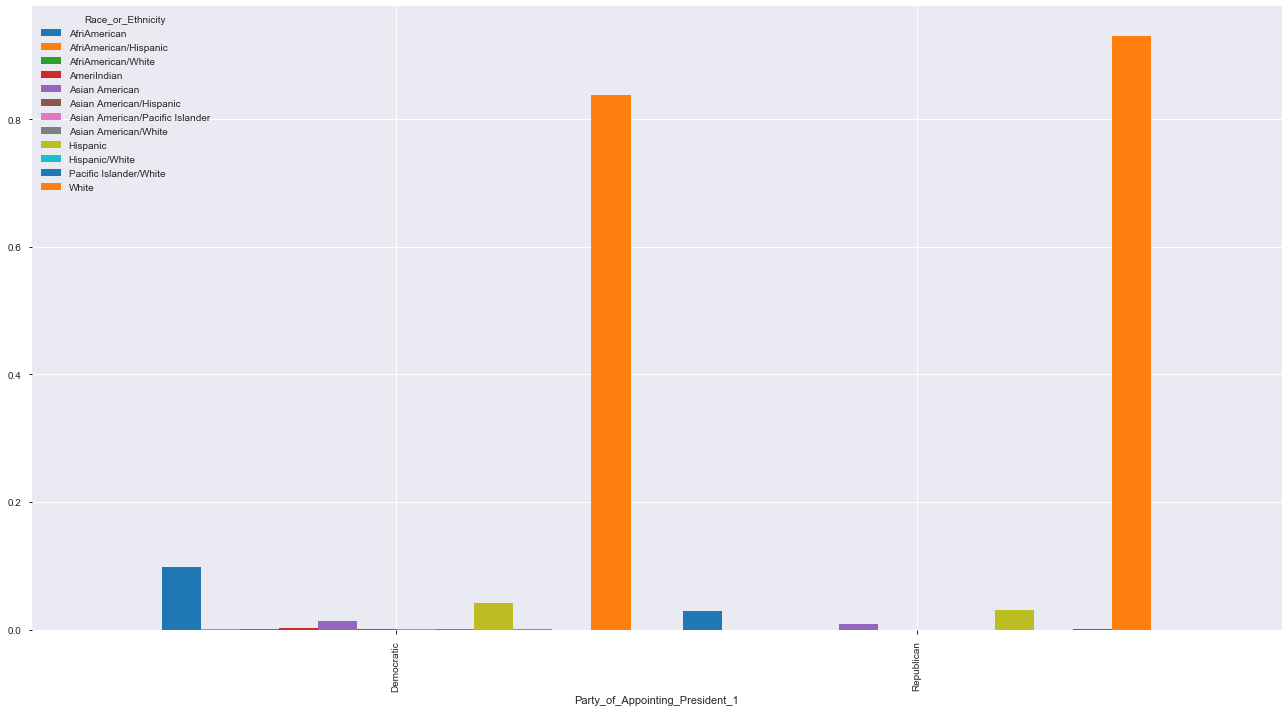

In [53]:
df[(df.Party_of_Appointing_President_1 == 'Democratic') | (df.Party_of_Appointing_President_1 == 'Republican')] \
    .groupby(by='Party_of_Appointing_President_1').Race_or_Ethnicity.value_counts(1).unstack().fillna(0) \
    .plot(kind='bar', width=.9, figsize=(18, 10))
plt.tight_layout()

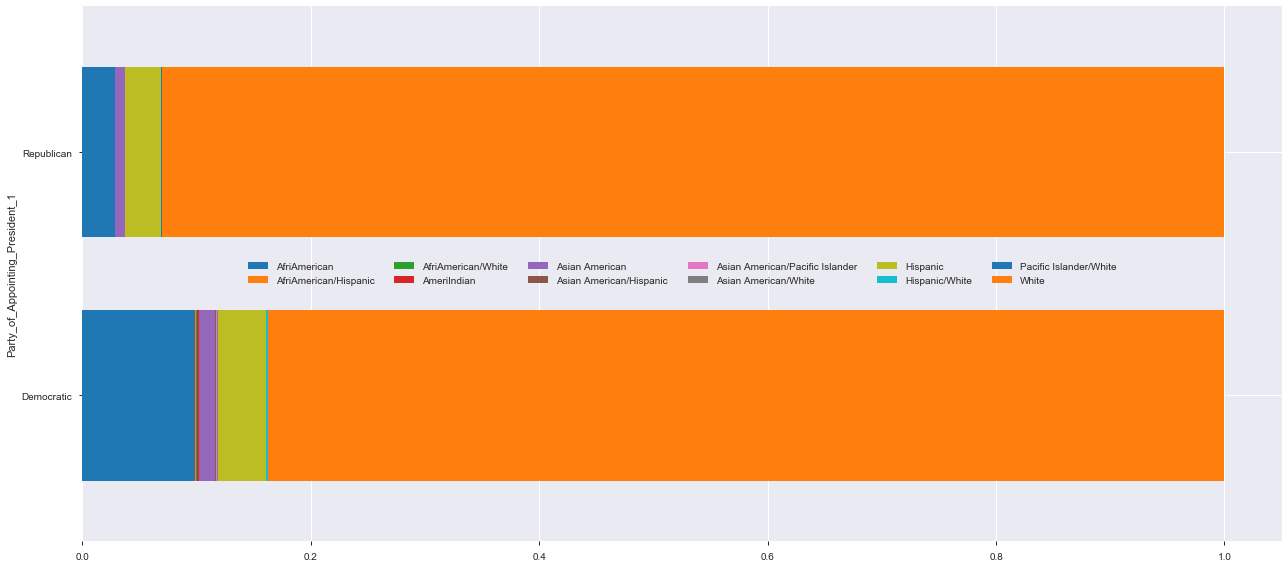

In [54]:
ax = df[(df.Party_of_Appointing_President_1 == 'Democratic') | (df.Party_of_Appointing_President_1 == 'Republican')] \
    .groupby(by='Party_of_Appointing_President_1').Race_or_Ethnicity.value_counts(1).unstack().fillna(0) \
    .plot(kind='barh', stacked=True, width=.7, figsize=(18, 8))
plt.legend(loc='center', ncol=6, columnspacing=2)
plt.tight_layout()

In [55]:
df['Appointment_Age_1'] =  ((df.Nomination_Date_1 - df.Birth_Date)/np.timedelta64(1, 'Y'))
df.Appointment_Age_1.sort_values(ascending=False).describe()

count    3461.000000
mean       51.116766
std         6.891250
min        25.347543
25%        46.276104
50%        51.272785
75%        56.138045
max        71.284147
Name: Appointment_Age_1, dtype: float64

In [56]:
df.loc[df.Appointment_Age_1.idxmax()][['Full_Name','Appointment_Age_1','Appointing_President_1','Court_Name_1']]

Full_Name                 William Raymond Green
Appointment_Age_1                       71.2841
Appointing_President_1          Calvin Coolidge
Court_Name_1                    Court of Claims
Name: 16, dtype: object

In [57]:
df.loc[df.Appointment_Age_1.idxmin()][['Full_Name','Appointment_Age_1','Appointing_President_1','Court_Name_1']]

Full_Name                                          Thomas Jefferson Boynton
Appointment_Age_1                                                   25.3475
Appointing_President_1                                      Abraham Lincoln
Court_Name_1              U.S. District Court for the Southern District ...
Name: 2235, dtype: object

In [58]:
df['Appointment_Age_Earliest'] = ((df[['Nomination_Date_1','Nomination_Date_2','Nomination_Date_3','Nomination_Date_4','Nomination_Date_5']].min(axis=1) - df.Birth_Date)/np.timedelta64(1, 'Y'))
df.loc[df.Appointment_Age_Earliest.idxmin()][['Full_Name','Appointment_Age_Earliest']]

Full_Name                   Thomas Jefferson Boynton
Appointment_Age_Earliest                     25.3475
Name: 2235, dtype: object

In [59]:
df.loc[(df.Appointment_Age_1.idxmin()) & (df.Court_Type_1 == 'Supreme Court')][['Full_Name','Appointment_Age_1']].sort_values(by='Appointment_Age_1').head()

,Full_Name,Appointment_Age_1
141,Joseph Story,32.156718
135,"William Johnson, Jr.",32.233379
126,Bushrod Washington,36.540107
124,James Iredell,38.347126
55,William Orville Douglas,40.422459


### Professional Background

In [60]:
df.Professional_Career.head()

0    Private practice, Accomack County, Virginia, 1...
1    Private practice, Charlestown, New Hampshire, ...
2    Private practice, Indiana Territory, 1812-1813...
3    Private practice and master in chancery, Suffo...
4    Private practice, Bloomington and Bedford, Ind...
Name: Professional_Career, dtype: object

In [61]:
df.Professional_Career = df.Professional_Career.astype(str)
# Counter(" ".join(df.Professional_Career).lower().split()).most_common(60)
pd.Series(' '.join(df.Professional_Career).lower().split()).value_counts().head(60)

of               6472
private          4180
practice,        4147
u.s.             3893
district         2264
attorney,        1863
the              1849
assistant        1774
new              1705
judge,           1451
court            1415
court,           1261
law              1257
state            1207
judicial         1101
attorney          939
clerk,            924
county,           876
hon.              809
and               803
for               795
county            745
member,           715
california,       697
justice,          654
united            635
law,              618
counsel,          614
states,           581
university        567
circuit,          561
army              558
general,          550
york,             540
pennsylvania,     535
texas,            484
supreme           482
department        478
york              474
deputy            471
city,             461
conference        454
washington,       447
city              442
special           437
illinois, 

In [62]:
df[df.Professional_Career.str.contains('army|navy|marine|force', na=False, flags = re.I)].groupby(by='Appointing_President_1').size().sort_values(ascending=False).head(15)

Appointing_President_1
Ronald Reagan            175
Jimmy Carter             152
Richard M. Nixon         132
Lyndon B. Johnson         85
George H.W. Bush          69
William J. Clinton        67
George W. Bush            55
Dwight D. Eisenhower      55
Franklin D. Roosevelt     46
Harry S Truman            43
John F. Kennedy           39
Gerald Ford               37
Grover Cleveland          28
Barack Obama              28
Donald J. Trump           16
dtype: int64

In [63]:
search_terms = ['professor','lecturer','faculty','dean']
df[df.Professional_Career.str.contains('|'.join(search_terms),na=False,case=False)].groupby(by='Appointing_President_1').size().sort_values(ascending=False).head(15)

Appointing_President_1
William J. Clinton       87
George W. Bush           68
Ronald Reagan            66
Jimmy Carter             55
Barack Obama             45
Donald J. Trump          34
Franklin D. Roosevelt    25
George H.W. Bush         24
Richard M. Nixon         23
Lyndon B. Johnson        20
Dwight D. Eisenhower     15
Harry S Truman           12
John F. Kennedy           8
Grover Cleveland          8
William H. Taft           7
dtype: int64

In [64]:
### Gave up trying to roll my own, found a ngrams library online

from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df.Professional_Career)
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by='frequency', ascending=False).head(20)

,frequency
private practice,4153
court of,1355
district of,1340
new york,1059
of the,964
assistant attorney,918
law clerk,861
clerk hon,774
for the,625
united states,623


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(3,4), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df.Professional_Career)
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by='frequency', ascending=False).head(20)

,frequency
law clerk hon,772
of the united,616
the united states,615
of the united states,614
conference of the united,413
conference of the,413
judicial conference of,410
judicial conference of the,410
court of appeals,385
member judicial conference,368


### Education

In [66]:
lastreadlaw = [df[df['School_1'] == 'Read law'].Degree_Year_1.max(),
               df[df['School_2'] == 'Read law'].Degree_Year_3.max(), 
               df[df['School_3'] == 'Read law'].Degree_Year_3.max(),
               df[df['School_4'] == 'Read law'].Degree_Year_4.max(), 
               df[df['School_5'] == 'Read law'].Degree_Year_5.max()
              ]
lastreadlaw

[Timestamp('1934-01-01 00:00:00'),
 Timestamp('1925-01-01 00:00:00'),
 Timestamp('1930-01-01 00:00:00'),
 Timestamp('1927-01-01 00:00:00'),
 Timestamp('1910-01-01 00:00:00')]

In [67]:
allschool_df = df[['Full_Name','Appointing_President_1','Party_of_Appointing_President_1']]
allschool_df['Schl1'] = df.School_1 + '-777777777-' + df.Degree_1.fillna('nun') + '-999999999-' + df.Degree_Year_1.astype(str).fillna('nun')
allschool_df['Schl2'] = df.School_2 + '-777777777-' + df.Degree_2.fillna('nun') + '-999999999-' + df.Degree_Year_2.astype(str).fillna('nun')
allschool_df['Schl3'] = df.School_3 + '-777777777-' + df.Degree_3.fillna('nun') + '-999999999-' + df.Degree_Year_3.astype(str).fillna('nun')
allschool_df['Schl4'] = df.School_4 + '-777777777-' + df.Degree_4.fillna('nun') + '-999999999-' + df.Degree_Year_4.astype(str).fillna('nun')
allschool_df['Schl5'] = df.School_5 + '-777777777-' + df.Degree_5.fillna('nun') + '-999999999-' + df.Degree_Year_5.astype(str).fillna('nun')

C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [68]:
allschool_df = allschool_df.melt(id_vars =['Full_Name','Appointing_President_1','Party_of_Appointing_President_1'], value_vars =['Schl1','Schl2','Schl3','Schl4','Schl5'], var_name='Degree_Number', value_name='School')

In [69]:
allschool_df.Degree_Number.replace(r'Schl',r'',regex=True,inplace=True)
allschool_df['Degree'] = allschool_df.School.str.extract('-777777777-(.*)-999999999-', expand=False)
allschool_df['Degree_Year'] = allschool_df.School.str.extract('.*-999999999-(.*)$', expand=False)
allschool_df['School'] = allschool_df.School.str.extract(r'(.*)-777777777-.*', expand=False)
allschool_df['DYear'] = allschool_df.Degree_Year.str.extract('^(\d\d\d\d).*', expand=False)
allschool_df.replace('nun',np.nan,inplace=True)
allschool_df.Degree_Year = allschool_df.Degree_Year.astype('datetime64[ns]') 

In [70]:
allschool_df.head(15)

,Full_Name,Appointing_President_1,Party_of_Appointing_President_1,Degree_Number,School,Degree,Degree_Year,DYear
0,George Parker Scarburgh,Franklin Pierce,Democratic,1,Read law with Thomas R. Joynes,NaN,1827-01-01,1827
1,John James Gilchrist,Franklin Pierce,Democratic,1,Harvard College,NaN,1828-01-01,1828
2,Isaac Newton Blackford,Franklin Pierce,Democratic,1,College of New Jersey (now Princeton University),NaN,1806-01-01,1806
3,Edward Greely Loring,James Buchanan,Democratic,1,Harvard College,A.B.,1821-01-01,1821
4,James Hughes,James Buchanan,Democratic,1,Indiana University,NaN,NaT,NaN
5,John Chandler Bancroft Davis,Chester A. Arthur,Republican,1,Read law,NaN,1844-01-01,1844
6,Lawrence Weldon,Chester A. Arthur,Republican,1,NaN,NaN,NaT,NaN
7,William Adams Richardson,Chester A. Arthur,Republican,1,Harvard College,A.B.,1843-01-01,1843
8,John Davis,Chester A. Arthur,Republican,1,University of Paris,NaN,NaT,NaN
9,George Wesley Atkinson,Theodore Roosevelt,Republican,1,Ohio Wesleyan University,A.B.,1870-01-01,1870


In [71]:
allschool_df['School_Neat'] = allschool_df['School']
allschool_df.School_Neat.replace(r'.*\(now (.*)\)',r'\1',regex=True,inplace=True)
allschool_df.replace({'School_Neat':{
    'College of':'Cof',
    ' College':'',
    'University of':'Uof',
    ' University':'',
    ' Department':'',
    ' Faculty':'',
    ' School':'',
    ' Center':'',
    ' of Law':'',
    ' Law':'',
    ' of Jurisprudence':'',
    ' of Business':'',
    ' Business':'',
    ' Administration':'',
    ' Wharton':'',
    ' Gould':'',
    ', Boalt Hall':'',
    ', Paul M. Hebert':'',
    '-Kansas City':'',
    ' -- Newark':'',
    ' -- Camden':'',
    '  ':' '
}},regex=True,inplace=True)
allschool_df.School_Neat.replace(r'\s?Cof','',regex=True,inplace=True)
allschool_df.School_Neat.replace(r'\s?$','',regex=True,inplace=True)
allschool_df.School_Neat.replace(r',$','',regex=True,inplace=True)
allschool_df.School_Neat.value_counts().head(60)

Harvard                        470
Read law                       444
Yale                           277
Uof Michigan                   177
Uof Virginia                   168
Columbia                       155
Uof Texas                      148
Georgetown                     126
Uof Pennsylvania               115
Stanford                       102
Princeton                       99
New York                        89
Uof California, Berkeley        85
Uof Florida                     73
Uof Chicago                     71
George Washington               66
Cornell                         64
Uof Alabama                     62
Northwestern                    61
Louisiana State                 61
Uof Missouri                    60
Uof Oklahoma                    57
Rutgers                         53
Uof Georgia                     53
Uof North Carolina              52
Duke                            51
Uof Iowa                        50
Vanderbilt                      49
Uof Arkansas        

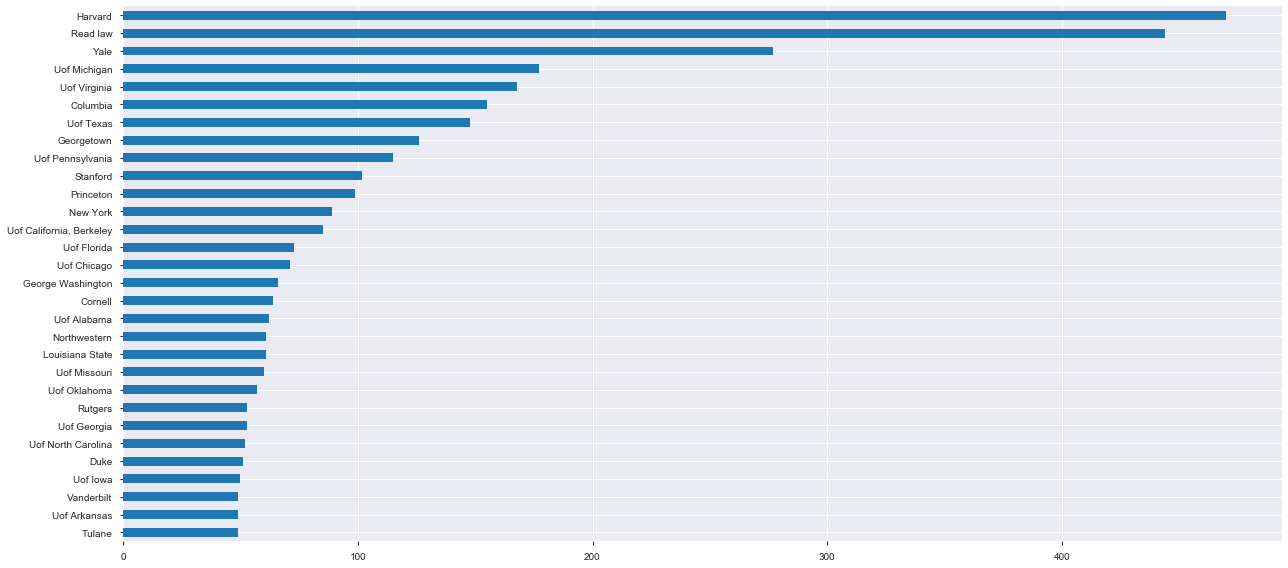

In [72]:
ax = allschool_df.School_Neat.value_counts().head(30).plot(kind='barh', figsize=(18, 8), y='School_Neat').invert_yaxis()
plt.tight_layout()

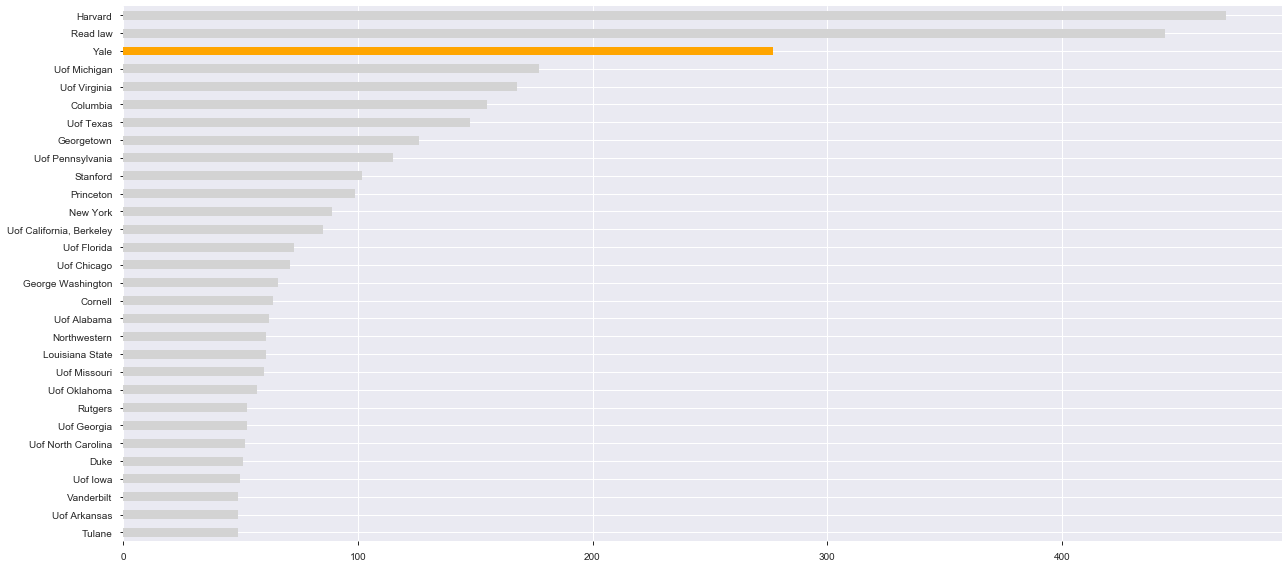

In [128]:
def build_colors(row):
    if row['School_Neat'] == 'Columbia':
        return 'lightblue'
    elif row['School_Neat'] == 'Princeton':
        return 'orange'
    else:
        return 'lightgrey'

colors = allschool_df.reset_index().apply(build_colors, axis=1)

ax = allschool_df.School_Neat.value_counts().head(30).plot(kind='barh', figsize=(18, 8), y='School_Neat', color=colors).invert_yaxis()
plt.tight_layout()

In [73]:
allschool_df.groupby(by='DYear').School_Neat.value_counts().unstack()

# allschool_df.School_Neat.value_counts().head(30).plot(kind='barh', figsize=(18, 8), y='School_Neat').invert_yaxis()
# allschool_df.School_Neat.value_counts().head(30).groupby(by='DYear').plot(kind='barh', figsize=(18, 8)).invert_yaxis()

# allschool_df.plot(x='DYear', y='School_Neat', figsize=(18, 5), lw=0.5)
# allschool_df.groupby(by='DYear').School_Neat.value_counts(1)

School_Neat,Central Florida,Charleston,Idaho,Notre Dame of Maryland,St. Rose,St. Scholastica,St. Thomas,William and Mary,Wooster,of Central,...,Wofford,Xavier Uof Louisiana,"Xavier, Ohio",Yale,Yale of Architecture,Yale of Organization and Management,"Yankton, South Dakota",Yeshiva,"Yeshiva, Benjamin N. Cardozo",Youngstown State
DYear,,,,,,,,,,,,,,,,,,,,,
1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
allschool_df.groupby(by='Party_of_Appointing_President_1').School_Neat.value_counts(1)

Party_of_Appointing_President_1  School_Neat                          
Democratic                       Harvard                                  0.070723
                                 Read law                                 0.050649
                                 Yale                                     0.041075
                                 Columbia                                 0.025633
                                 Uof Texas                                0.024707
                                 Uof Virginia                             0.022854
                                 Uof Michigan                             0.021309
                                 Georgetown                               0.020692
                                 Uof California, Berkeley                 0.014824
                                 Stanford                                 0.014515
                                 Uof Florida                              0.014515
                

In [75]:
allschool_df.Degree.value_counts().head(20)

J.D.          1667
B.A.          1368
LL.B.         1264
A.B.           731
B.S.           409
LL.M.          129
M.A.           121
B.B.A.          57
A.M.            53
A.A.            45
Ph.B.           31
M.S.            17
M.B.A.          16
Ph.D.           13
B.S.B.A.        10
M.P.A.           9
B.S.L.           7
B.L.             7
S.J.D.           6
B.A., B.S.       6
Name: Degree, dtype: int64

In [76]:
allschool_df['Degree_Neat'] = allschool_df['Degree']
allschool_df.replace({'Degree_Neat':{
    ', letters':'',
    ', business':'',
    ', economics':'',
    ', commerce':'',
    ', law':'',
    ', judicial studies':'',
    ', judicial process':'',
    ', politiphilosophy':'',
    ', civil engineering':'',
    ' of Completion':'',
    ' in Law':'',
    ' in English Law':'',
    ' in Legal Studies':'',
    ' in Jurisprudence':'',
    ' in Social Science':'',
    ' in Dispute Resolution':'',
    ' in Regulatory Economics':'',
    ' in International Arbitration':'',
    ' in Foreign and Comparative Law':'',
    ', Certificate of Business Studies':'',
    'Civil Mediator ':'',
}},regex=True,inplace=True)
allschool_df.replace({'Degree_Neat':{
    'D.Phil.':'Ph.D.',
    'A.B.':'B.A.',
    'A.M.':'M.A.',
    'B.L.':'LL.B.',
    'B.M.A.':'B.A.',
    'J.S.D.':'S.J.D.',
    'B.S.B.A.':'B.B.A.',
    'B.S.C.E.':'B.S.',
    'B.S.E.E.':'B.S.',
    'B.S.E.':'B.S.',
    'B.E.E.':'B.S.',
    'B.S.Ag.E.':'B.S.',
    'B.Sc.':'B.S.',
    'M.Sc.':'M.S.',
    'M.C.S.':'M.S.',
    '..':'',
    '  ':' '
}},regex=False,inplace=True)
allschool_df.Degree_Neat.value_counts().head(30)

B.A.           2104
J.D.           1667
LL.B.          1271
B.S.            426
M.A.            174
LL.M.           133
B.B.A.           67
A.A.             45
Ph.B.            31
M.S.             21
M.B.A.           16
Ph.D.            16
M.P.A.            9
S.J.D.            8
B.S.L.            7
Certificate       6
Diploma           6
B.A., B.S.        6
Litt.B.           5
B.S.F.S.          4
M.Phil.           4
M.S.W.            4
M.Ed.             3
M.Litt.           3
M.J.S.            3
M.A.T.            3
B.C.S.            2
M.L.S.            2
B.Litt.           2
Ph.G.             2
Name: Degree_Neat, dtype: int64

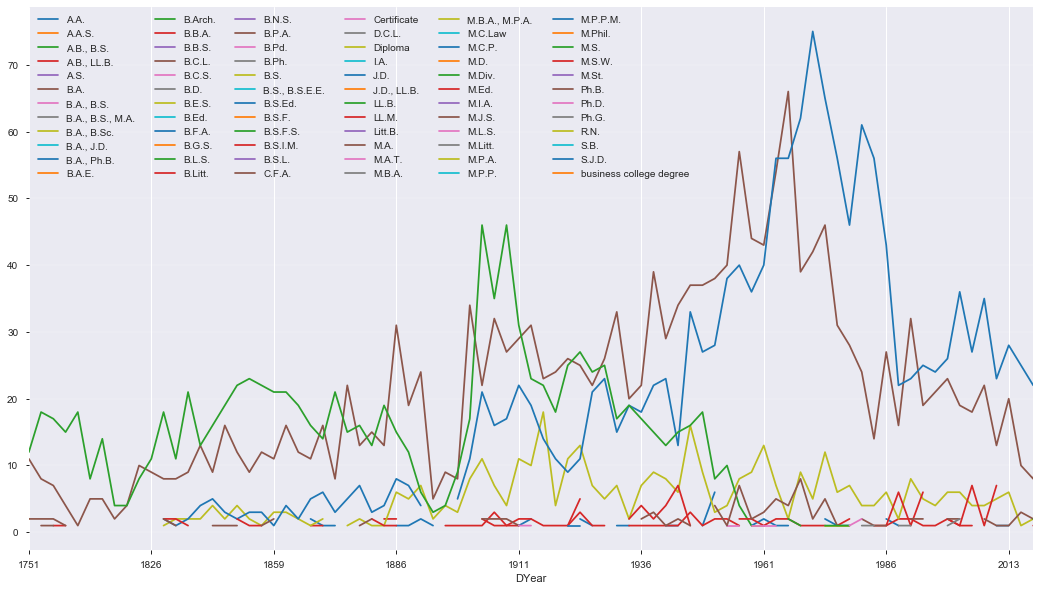

In [126]:
# def build_colors(row):
#     if row['Degree_Neat'] == 'J.D.':
#         return 'green'
#     elif row['Degree_Neat'] == 'LL.M.':
#         return 'blue'
#     elif row['Degree_Neat'] == 'LL.B.':
#         return 'gold'
#     else:
#         return 'lightgrey'

# colors = allschool_df.reset_index().apply(build_colors, axis=1)

ax = allschool_df.groupby(by='DYear').Degree_Neat.value_counts().unstack().plot(figsize=(18, 10), kind='line')
plt.legend(ncol=6, columnspacing=2)
ax.get_xlim()
ax.set_xlim(100, 182)
ax.yaxis.grid(linewidth=0.25)

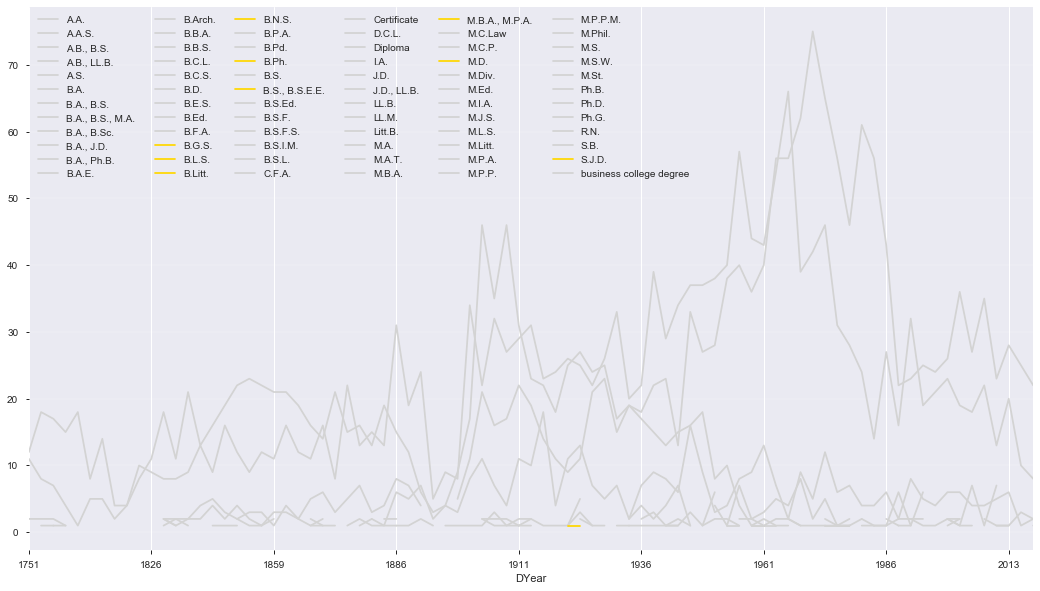

In [127]:
def build_colors(row):
    if row['Degree_Neat'] == 'J.D.':
        return 'green'
    elif row['Degree_Neat'] == 'LL.M.':
        return 'blue'
    elif row['Degree_Neat'] == 'LL.B.':
        return 'gold'
    else:
        return 'lightgrey'

colors = allschool_df.reset_index().apply(build_colors, axis=1)

ax = allschool_df.groupby(by='DYear').Degree_Neat.value_counts().unstack().plot(figsize=(18, 10), kind='line', color=colors)
plt.legend(ncol=6, columnspacing=2)
ax.get_xlim()
ax.set_xlim(100, 182)
ax.yaxis.grid(linewidth=0.25)

In [78]:
allschool_df.to_csv('sources/schooling_hist.csv', index=False)

# Possible Deletions

### Mostly Useless Info

In [ ]:
# df = df.drop(['nid','jid', 
#               'Seat_ID_1','Reappointing_President_1','Party_of_Reappointing_President_1','Statute_Authorizing_New_Seat_1','Service_as_Chief_Judge_Begin_1','Service_as_Chief_Judge_End_1','2nd_Service_as_Chief_Judge_Begin_1','2nd_Service_as_Chief_Judge_End_1',
#               'Seat_ID_2','Reappointing_President_2','Party_of_Reappointing_President_2','Statute_Authorizing_New_Seat_2','Service_as_Chief_Judge_Begin_2','Service_as_Chief_Judge_End_2','2nd_Service_as_Chief_Judge_Begin_2','2nd_Service_as_Chief_Judge_End_2',
#               'Seat_ID_3','Reappointing_President_3','Party_of_Reappointing_President_3','Statute_Authorizing_New_Seat_3','Service_as_Chief_Judge_Begin_3','Service_as_Chief_Judge_End_3','3nd_Service_as_Chief_Judge_Begin_3','3nd_Service_as_Chief_Judge_End_3',
#               'Seat_ID_4','Reappointing_President_4','Party_of_Reappointing_President_4','Statute_Authorizing_New_Seat_4','Service_as_Chief_Judge_Begin_4','Service_as_Chief_Judge_End_4','4nd_Service_as_Chief_Judge_Begin_4','4nd_Service_as_Chief_Judge_End_4',
#               'Seat_ID_5','Reappointing_President_5','Party_of_Reappointing_President_5','Statute_Authorizing_New_Seat_5','Service_as_Chief_Judge_Begin_5','Service_as_Chief_Judge_End_5','5nd_Service_as_Chief_Judge_Begin_5','5nd_Service_as_Chief_Judge_End_5',
#               'Seat_ID_6','Reappointing_President_6','Party_of_Reappointing_President_6','Statute_Authorizing_New_Seat_6','Service_as_Chief_Judge_Begin_6','Service_as_Chief_Judge_End_6','6nd_Service_as_Chief_Judge_Begin_6','6nd_Service_as_Chief_Judge_End_6'
#              ], axis=1)

### Complex Strings Requiring Detailed Parsing

In [ ]:
# df = df.drop(['Other_Federal_Judicial_Service_1','Other_Federal_Judicial_Service_2','Other_Federal_Judicial_Service_3','Other_Federal_Judicial_Service_4',
#               'Professional_Career','Other_Nominations_n_Recess_Appointments'
#              ], axis=1)

### If Concerned Only with Last Positions Held

In [ ]:
# df = df.drop([
#     'Court_Type_2','Court_Name_2','Appointment_Title_2','Appointing_President_2','Party_of_Appointing_President_2','Reappointing_President_2','Party_of_Reappointing_President_2','ABA_Rating_2','Seat_ID_2','Statute_Authorizing_New_Seat_2','Recess_Appointment_Date_2','Nomination_Date_2','Committee_Referral_Date_2','Hearing_Date_2','Judiciary_Committee_Action_2','Committee_Action_Date_2','Senate_Vote_Type_2','Ayes_n_Nays_2','Confirmation_Date_2','Commission_Date_2','Service_as_Chief_Judge_Begin_2','Service_as_Chief_Judge_End_2','2nd_Service_as_Chief_Judge_Begin_2','2nd_Service_as_Chief_Judge_End_2','Senior_Status_Date_2','Termination_2','Termination_Date_2',
#     'Court_Type_3','Court_Name_3','Appointment_Title_3','Appointing_President_3','Party_of_Appointing_President_3','Reappointing_President_3','Party_of_Reappointing_President_3','ABA_Rating_3','Seat_ID_3','Statute_Authorizing_New_Seat_3','Recess_Appointment_Date_3','Nomination_Date_3','Committee_Referral_Date_3','Hearing_Date_3','Judiciary_Committee_Action_3','Committee_Action_Date_3','Senate_Vote_Type_3','Ayes_n_Nays_3','Confirmation_Date_3','Commission_Date_3','Service_as_Chief_Judge_Begin_3','Service_as_Chief_Judge_End_3','2nd_Service_as_Chief_Judge_Begin_3','2nd_Service_as_Chief_Judge_End_3','Senior_Status_Date_3','Termination_3','Termination_Date_3',
#     'Court_Type_4','Court_Name_4','Appointment_Title_4','Appointing_President_4','Party_of_Appointing_President_4','Reappointing_President_4','Party_of_Reappointing_President_4','ABA_Rating_4','Seat_ID_4','Statute_Authorizing_New_Seat_4','Recess_Appointment_Date_4','Nomination_Date_4','Committee_Referral_Date_4','Hearing_Date_4','Judiciary_Committee_Action_4','Committee_Action_Date_4','Senate_Vote_Type_4','Ayes_n_Nays_4','Confirmation_Date_4','Commission_Date_4','Service_as_Chief_Judge_Begin_4','Service_as_Chief_Judge_End_4','2nd_Service_as_Chief_Judge_Begin_4','2nd_Service_as_Chief_Judge_End_4','Senior_Status_Date_4','Termination_4','Termination_Date_4',
#     'Court_Type_5','Court_Name_5','Appointment_Title_5','Appointing_President_5','Party_of_Appointing_President_5','Reappointing_President_5','Party_of_Reappointing_President_5','ABA_Rating_5','Seat_ID_5','Statute_Authorizing_New_Seat_5','Recess_Appointment_Date_5','Nomination_Date_5','Committee_Referral_Date_5','Hearing_Date_5','Judiciary_Committee_Action_5','Committee_Action_Date_5','Senate_Vote_Type_5','Ayes_n_Nays_5','Confirmation_Date_5','Commission_Date_5','Service_as_Chief_Judge_Begin_5','Service_as_Chief_Judge_End_5','2nd_Service_as_Chief_Judge_Begin_5','2nd_Service_as_Chief_Judge_End_5','Senior_Status_Date_5','Termination_5','Termination_Date_5',
#     'Court_Type_6','Court_Name_6','Appointment_Title_6','Appointing_President_6','Party_of_Appointing_President_6','Reappointing_President_6','Party_of_Reappointing_President_6','ABA_Rating_6','Seat_ID_6','Statute_Authorizing_New_Seat_6','Recess_Appointment_Date_6','Nomination_Date_6','Committee_Referral_Date_6','Hearing_Date_6','Judiciary_Committee_Action_6','Committee_Action_Date_6','Senate_Vote_Type_6','Ayes_n_Nays_6','Confirmation_Date_6','Commission_Date_6','Service_as_Chief_Judge_Begin_6','Service_as_Chief_Judge_End_6','2nd_Service_as_Chief_Judge_Begin_6','2nd_Service_as_Chief_Judge_End_6','Senior_Status_Date_6','Termination_6','Termination_Date_6'
# ], axis=1)

### If Concerned Only with Positions Currently Held

In [ ]:
# df = df[pd.isna(df['Termination_1'])]

### If Concerned Only with Positions Currently and Actively Held (No Senior Status)

In [ ]:
# df = df[pd.isna(df['Termination_1'])]
# df = df[pd.isna(df['Senior_Status_Date_1'])]

### Delete Extranious Court Jurisdictions

In [ ]:
# ###  SUPREME COURT
# df.drop(df[df.Court_Type_1 == 'Supreme Court'].index, inplace=True)

# ###  CIRCUIT COURTS OF APPEALS
# df.drop(df[df.Court_Type_1 == 'U.S. Court of Appeals'].index, inplace=True)

# ###  DISTRICT COURTS
# df.drop(df[df.Court_Type_1 == 'U.S. District Court'].index, inplace=True)

# ###  OTHER (Court of International Trade)
# df.drop(df[df.Court_Type_1 == 'Other'].index, inplace=True)

In [ ]:
df.Court_Type_1.value_counts()


# Export

In [ ]:
### Turn Datetime years (with no month/day data) back to string
# df.Degree_Year_1 = df.Degree_Year_1.dt.year.astype(str).str.replace(r'.0','')
# df.Degree_Year_2 = df.Degree_Year_2.dt.year.astype(str).str.replace(r'.0','')
# df.Degree_Year_3 = df.Degree_Year_3.dt.year.astype(str).str.replace(r'.0','')
# df.Degree_Year_4 = df.Degree_Year_4.dt.year.astype(str).str.replace(r'.0','')
# df.Degree_Year_5 = df.Degree_Year_5.dt.year.astype(str).str.replace(r'.0','')

In [ ]:
df.to_csv('sources/judges_panda-ed.csv', date_format='%Y-%m-%d', index=False)

In [ ]:
# df.profile_report()